<a href="https://colab.research.google.com/github/dkaratzas/ML2024-25/blob/main/Session%204%20-%20Regularisation/P4_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/dkaratzas/ML2024-25/blob/main/Session%204%20-%20Regularisation/P4_Regularisation.ipynb>)

# Problems 4 - Regularisation

## 4.1 Improving the fit - Regression

Suppose you are fitting a linear regression model: $f(x) = w_0+w_1 x_1$ on the same training set as in last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pickle

# Load the House dataset
with open('PolynomialData.pkl', 'rb') as f:
    x, y = pickle.load(f)

print (x.shape)
print (y.shape)

(50, 1)
(50,)


Plotting these data looks like this:

Text(0, 0.5, 'Observed y (output)')

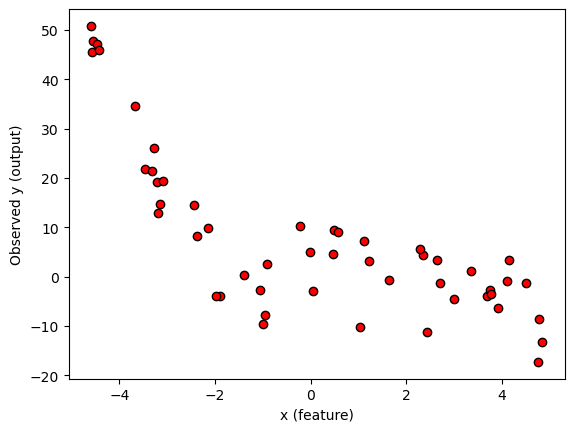

In [3]:
plt.scatter(x, y, marker = 'o', edgecolor = 'black', c = 'red')
plt.xlabel('x (feature)')
plt.ylabel('Observed y (output)')

Let's redefine our function `map_feature()` for generating polynomial features. Remember that we also normalise our data inside the same function. If we do so, we should keep the mean and standard deviation values we used for the normalisation, as we might need to use them again later on, with new data. Therefore, we **return** the mean and standard deviation values we calculated so that they can be saved for future use.

In addition, we made the mean and standard deviation variables into **arguments** of this function, that have a default value of an empty array. This way we can check what these arguments are everytime. If we are given nothing (therefore these are empty arrays), we will calculate the means and standard deviations inside our function and use them for the normalisation. If we are given something, then we will use the values we are given for normalization. This way we provide a neat mechanism to tell the function how to normalise each time.

In [4]:
def map_feature(x, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps a single 1D feature to polynomial features up to the degree given
    Returns a new feature vector comprising of
    1, x, x^2, x^3, ..., x^degree
    '''
    
    x = x.reshape(-1, 1) #make into a vector if it has any other shape. The function size returns the number of elements in an array
    
    DesignMatrix = np.ones_like(x) # start with a column of ones
    
    for i in range(1, degree + 1):
            c = x ** i
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd
    
    # Standardise
    for i in range(1, degree + 1):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i]
                
    return DesignMatrix, mu, sigma

We will also redefine our `GradientDescent_np()` for running the Gradient Descent algorithm.

In [5]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m, n = X.shape # number of samples, number of features
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,w) - y)) / m;
        w = w - alpha*grad
        J[iteration] = sum( (np.dot(X,w) - y)**2) /(2*m)
    return [w, J]

Now, let's recover what we did in the last session. We will try polynomials of different degrees on our data, and see how the fit changes. In order to be easier to see, instead of running the code many times, we will do a figure with a few subplots.

/tmp/ipykernel_18821/1932023990.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[iteration] = sum( (np.dot(X,w) - y)**2) /(2*m)
/tmp/ipykernel_18821/2529101853.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xx = np.arange(min(x)-1, max(x)+1, 0.05)
/tmp/ipykernel_18821/2529101853.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters)) # The % opera

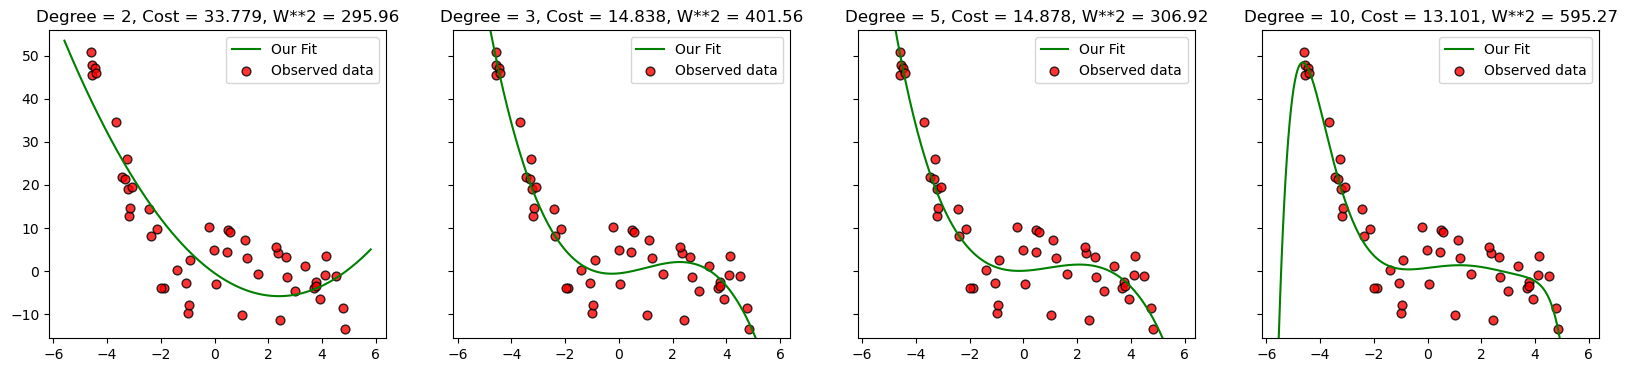

In [6]:
degreeRange = [2, 3, 5, 10] # Define the list of degrees we want to try out

fig, ax = plt.subplots(1, len(degreeRange), sharey = True, figsize = (20,4)) # Create a row of as many subplots as degrees we want to check

for deg, axis in zip(degreeRange, ax): # The zip() function "zips" two lists together, and creates a new list of tuples. See https://docs.python.org/3/library/functions.html#zip
    x_norm, means, stds = map_feature(x, degree = deg) # Generate features up to the corresponding degree

    w, J = GradientDescent_np(x_norm, y, alpha = 0.1, max_iterations=1500) # run our Gradient Descent

    # plot our FIT
    xx = np.arange(min(x)-1, max(x)+1, 0.05)    
    xx_out, means, stds = map_feature(xx, degree = deg, preCalcMeans=means, preCalcStd=stds) # Generate features from the new inputs, using the same means and STDs like before
    y_out = xx_out @ w # Note how easy is to calculate the output of our model by doing a simple matrix - vector multiplication. Last time we wrote this by hand using a for loop
    axis.plot(xx, y_out, color='green', label='Our Fit') # Note that instead of plt. we use axis. This is in order to tell matplotlib to draw inside the current subplot. See https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.subplots.html

    #plot the data
    axis.scatter(x, y, s=40, c='red', edgecolor = 'k', linewidth = 1, label='Observed data', alpha = 0.8)
    
    axis.legend() # Show a legend, with all the "labels" we have provided
    axis.set_ylim(0.9 * min(y), 1.1 * max(y))

    SquaredParameters = w.T @ w
    
    # Add a title to our subplot that explains what it is
    axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters)) # The % operator of a string is called the formatting operator. Read here for details: https://docs.python.org/2/library/stdtypes.html#string-formatting

<font color='blue'>Can you calculate how big are our weights in each case, and add this information in the title? To do that calculate the sum of the squares of the weights.</font>

<font color='blue'>What do you expect? What do you observe?</font>

/tmp/ipykernel_18821/1932023990.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[iteration] = sum( (np.dot(X,w) - y)**2) /(2*m)
/tmp/ipykernel_18821/2001819503.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xx = np.arange(min(x)-1, max(x)+1, 0.05)
/tmp/ipykernel_18821/2001819503.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters)) # The % opera

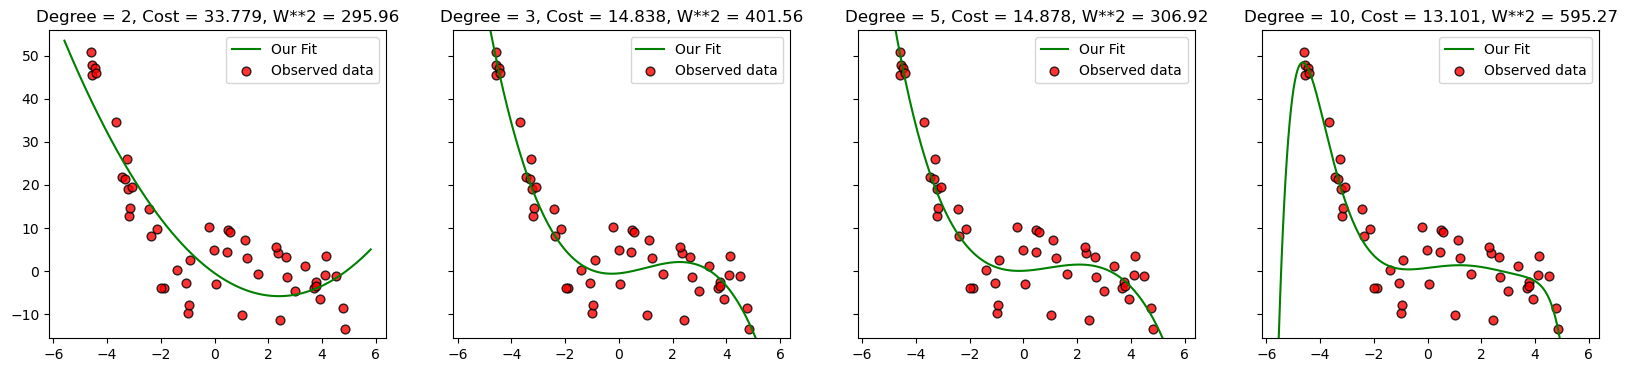

In [7]:
# YOUR CODE HERE
degreeRange = [2, 3, 5, 10] # Define the list of degrees we want to try out

fig, ax = plt.subplots(1, len(degreeRange), sharey = True, figsize = (20,4)) # Create a row of as many subplots as degrees we want to check

for deg, axis in zip(degreeRange, ax): # The zip() function "zips" two lists together, and creates a new list of tuples. See https://docs.python.org/3/library/functions.html#zip
    x_norm, means, stds = map_feature(x, degree = deg) # Generate features up to the corresponding degree

    w, J = GradientDescent_np(x_norm, y, alpha = 0.1, max_iterations=1500) # run our Gradient Descent

    # plot our FIT
    xx = np.arange(min(x)-1, max(x)+1, 0.05)    
    xx_out, means, stds = map_feature(xx, degree = deg, preCalcMeans=means, preCalcStd=stds) # Generate features from the new inputs, using the same means and STDs like before
    y_out = xx_out @ w # Note how easy is to calculate the output of our model by doing a simple matrix - vector multiplication. Last time we wrote this by hand using a for loop
    axis.plot(xx, y_out, color='green', label='Our Fit') # Note that instead of plt. we use axis. This is in order to tell matplotlib to draw inside the current subplot. See https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.subplots.html

    #plot the data
    axis.scatter(x, y, s=40, c='red', edgecolor = 'k', linewidth = 1, label='Observed data', alpha = 0.8)
    
    axis.legend() # Show a legend, with all the "labels" we have provided
    axis.set_ylim(0.9 * min(y), 1.1 * max(y))

    SquaredParameters = w.T @ w
    
    # Add a title to our subplot that explains what it is
    axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters)) # The % operator of a string is called the formatting operator. Read here for details: https://docs.python.org/2/library/stdtypes.html#string-formatting



---

Before the models did not converge properly because there were not enough max iterations.
To verify this we can see the loss plots over time to verify if they converge or not:

---


/tmp/ipykernel_18821/1932023990.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[iteration] = sum( (np.dot(X,w) - y)**2) /(2*m)
/tmp/ipykernel_18821/1542117566.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters)) # The % operator of a string is called the formatting operator. Read here for details: https://docs.python.org/2/library/stdtypes.html#string-formatting


Text(0.5, 1.0, 'Degree = 10, Cost = 13.101, W**2 = 595.27')

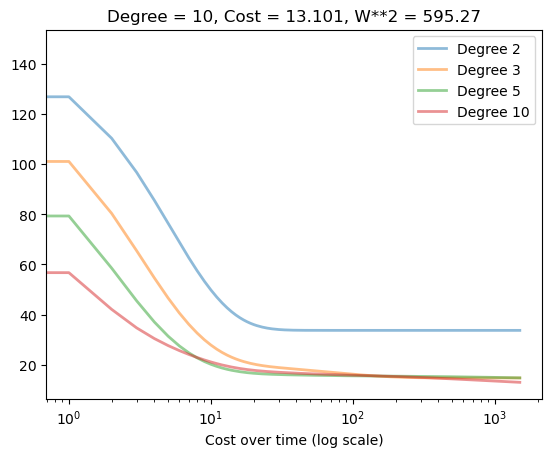

In [8]:
# YOUR CODE HERE
degreeRange = [2, 3, 5, 10] # Define the list of degrees we want to try out


for deg, axis in zip(degreeRange, ax): # The zip() function "zips" two lists together, and creates a new list of tuples. See https://docs.python.org/3/library/functions.html#zip
    x_norm, means, stds = map_feature(x, degree = deg) # Generate features up to the corresponding degree

    w, J = GradientDescent_np(x_norm, y, alpha = 0.1, max_iterations=1500) # run our Gradient Descent

    # plot our FIT
    xx = np.arange(len(J))    
    xx_out, means, stds = map_feature(xx, degree = deg, preCalcMeans=means, preCalcStd=stds) # Generate features from the new inputs, using the same means and STDs like before
    
    plt.plot(xx, J, label=f'Degree {deg}', alpha=.5, linewidth=2)
    plt.legend() # Show a legend, with all the "labels" we have provided
    plt.xscale('log')
    plt.xlabel('Cost over time (log scale)')

    SquaredParameters = w.T @ w
    
    # Add a title to our subplot that explains what it is
plt.title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters)) # The % operator of a string is called the formatting operator. Read here for details: https://docs.python.org/2/library/stdtypes.html#string-formatting


---

Observe how the final cost is the same one on all of the run, except in the more simple one. It should not be this way, since a more complex model has the potential to better fit the data. Now we will increase the number of iterations to see if the final cost divergences on the different runs:

---

/tmp/ipykernel_18821/1932023990.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[iteration] = sum( (np.dot(X,w) - y)**2) /(2*m)
/tmp/ipykernel_18821/1426771242.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xx = np.arange(min(x)-1, max(x)+1, 0.05)
/tmp/ipykernel_18821/1426771242.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters))


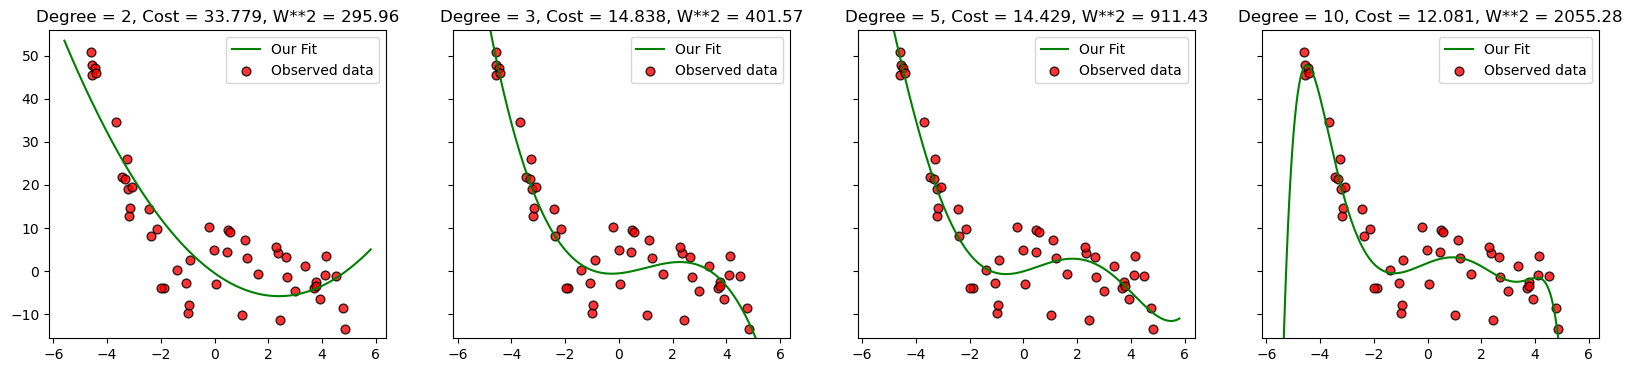

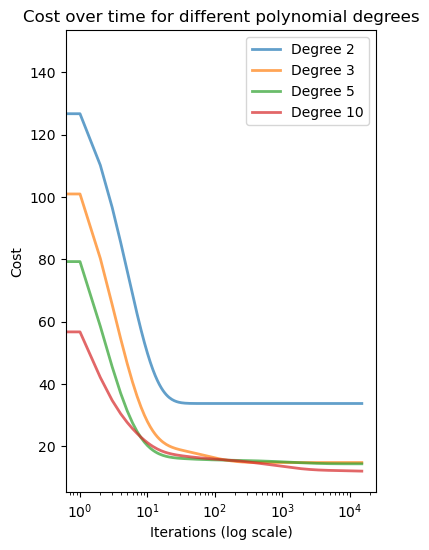

In [9]:
degreeRange = [2, 3, 5, 10]  # Define the list of degrees we want to try out

# Create a figure with subplots, one for each degree
fig, ax = plt.subplots(1, len(degreeRange), sharey=True, figsize=(20, 4))

# Create a new figure for the cost plot
fig_cost, ax_cost = plt.subplots(figsize=(4, 6))

for deg, axis in zip(degreeRange, ax):
    # Generate features up to the corresponding degree
    x_norm, means, stds = map_feature(x, degree=deg)

    # Run Gradient Descent
    w, J = GradientDescent_np(x_norm, y, alpha=0.1, max_iterations=15000) # CHANGE IN THE ITERAION AMOUNTS

    # Generate a range for the x values for plotting the fit
    xx = np.arange(min(x)-1, max(x)+1, 0.05)
    xx_out, means, stds = map_feature(xx, degree=deg, preCalcMeans=means, preCalcStd=stds)
    
    # Calculate the output using the model
    y_out = xx_out @ w
    
    # Plot the fit in the corresponding subplot
    axis.plot(xx, y_out, color='green', label='Our Fit')
    
    # Scatter the original data points
    axis.scatter(x, y, s=40, c='red', edgecolor='k', linewidth=1, label='Observed data', alpha=0.8)
    
    # Add title and legend to the subplot
    axis.legend()
    axis.set_ylim(0.9 * min(y), 1.1 * max(y))
    
    # Calculate the square of the parameters (regularization term)
    SquaredParameters = w.T @ w
    
    # Add a title to the subplot
    axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters))

    # Plot the cost in the separate cost plot
    xx_cost = np.arange(len(J))  # X-axis for cost plot (iterations)
    ax_cost.plot(xx_cost, J, label=f'Degree {deg}', alpha=0.7, linewidth=2)

# Configure the cost plot
ax_cost.set_xscale('log')  # Set x-axis to log scale
ax_cost.set_xlabel('Iterations (log scale)')
ax_cost.set_ylabel('Cost')
ax_cost.set_title('Cost over time for different polynomial degrees')
ax_cost.legend()

# Show both plots
plt.show()


---

Notice how the 10-degree run ends with a lower cost and seems to fit better the data due to the model itself being more flexible and able to do so.
We needed more iterations to fit the 10-degree polynomial to the data. In gradient descent the more data you want to train, the more iterations are needed.

---

Instead of trying to control the complexity of the model (by changing the number of degrees), we said we could use a complex model, but introduce regularization to control the complexity of the fit (how smooth of wiggly the curve will be).

Let's change our Gradient Descent algorithm, to add this regularisation term. This implies adding a term in the cost that corresponds to $\lambda \sum_{i=0}^n(w_i^2)$ or else $\lambda\bf{w}^Tw$. This means that in the calculation of gradient descent we should add the derivative in respect to $w_i$ which would be $2\lambda w_i$.

The parameter $\lambda$ is the regularization coefficient. The bigger it is, the more important this new term is (and the smoother our function will be). Setting this to zero, means using no regularization, so we would be reverting to the previous version of our Gradient Decent.

Remember that we do not include the bias parameter $w_0$ in the regularization.

In [10]:
def GradientDescent_np_withReg(X, y, max_iterations=100, alpha=1, lam = 1):
    m, n = X.shape # number of samples, number of features
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        w_copy = w.copy()
        w_copy[0] = 0 # ignore the bias term in the regularisation
        grad = (X.T @ ((X @ w) - y))/m + 2 * lam * w_copy
        w = w - alpha*grad
        J[iteration] = sum( ((X @ w) - y)**2)/(2*m) + lam * (w_copy.T @ w_copy)
    return [w, J]

<font color='blue'>Now can you do the same like before but instead of trying different models (different degrees), let's fix the model to a 10 degrees one, and try different values for lambda: [0, 0.01, 0.1, 1].</font>

<font color='blue'>What do you expect? What do you observe?</font>

/tmp/ipykernel_18821/2267644625.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[iteration] = sum( ((X @ w) - y)**2)/(2*m) + lam * (w_copy.T @ w_copy)
/tmp/ipykernel_18821/2519757371.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xx = np.arange(min(x)-1, max(x)+1, 0.05)
/tmp/ipykernel_18821/2519757371.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredPar

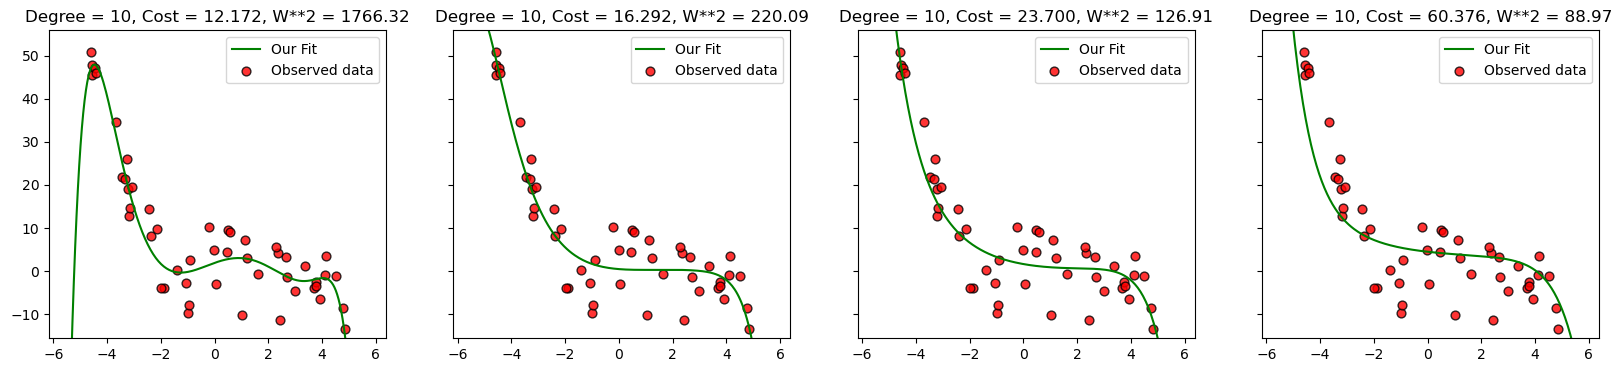

In [11]:
# YOUR CODE HERE #

deg = 10
lambdas = [0, .01, .1, 1]

fig, ax = plt.subplots(1, len(lambdas), sharey = True, figsize = (20,4)) # Create a row of as many subplots as degrees we want to check

for lambda_, axis in zip(lambdas, ax): # The zip() function "zips" two lists together, and creates a new list of tuples. See https://docs.python.org/3/library/functions.html#zip
    x_norm, means, stds = map_feature(x, degree = deg) # Generate features up to the corresponding degree

    w, J = GradientDescent_np_withReg(x_norm, y, alpha = 0.1, max_iterations=10000, lam=lambda_)

    xx = np.arange(min(x)-1, max(x)+1, 0.05)    
    xx_out, means, stds = map_feature(xx, degree = deg, preCalcMeans=means, preCalcStd=stds) # Generate features from the new inputs, using the same means and STDs like before
    y_out = xx_out @ w # Note how easy is to calculate the output of our model by doing a simple matrix - vector multiplication. Last time we wrote this by hand using a for loop
    axis.plot(xx, y_out, color='green', label='Our Fit') # Note that instead of plt. we use axis. This is in order to tell matplotlib to draw inside the current subplot. See https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.subplots.html

    axis.scatter(x, y, s=40, c='red', edgecolor = 'k', linewidth = 1, label='Observed data', alpha = 0.8)
    
    axis.legend() # Show a legend, with all the "labels" we have provided
    axis.set_ylim(0.9 * min(y), 1.1 * max(y))

    SquaredParameters = w.T @ w
    
    axis.set_title('Degree = {0}, Cost = {1}, W**2 = {2}'.format(deg, '%.3f' % J[-1], '%.2f' % SquaredParameters)) # The % operator of a string is called the formatting operator. Read here for details: https://docs.python.org/2/library/stdtypes.html#string-formatting
    

---

It seems that with `lambda = 0` 

---


## 4.2 Regularized Logistic Regression

We will start with the same dataset like last time

In [12]:
# Load the synthetic dataset
import pickle

with open('RingsData.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


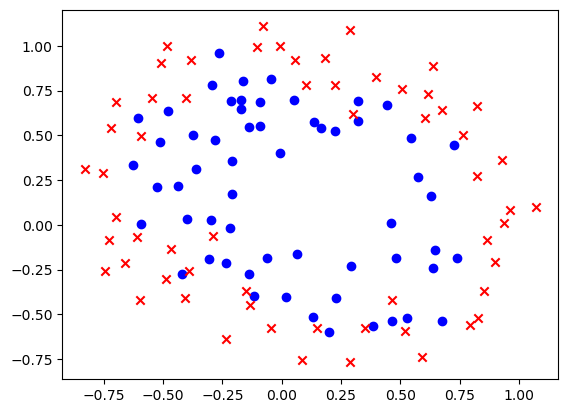

In [13]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

In order to implement Regularized Logistic Regression we must change only the term of the partial derivative (the gradient) of the cost function:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$.

which in the case of Regularized Logistic Regression is given by:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}+2{\lambda \over m}w_j}$

But remember that we do not want to regularise the bias term.

<font color=blue>Implement the Regularized Logistic Regression in Python.</font>

In [14]:
def sigmoid(X):
    '''
    Computes the Sigmoid function of the input argument X.
    '''
    return 1.0/(1+np.exp(-X))

In [68]:
def GradientDescent_logistic_reg(X, y, max_iterations=10000, alpha=0.1, epsilon = 0.0000001, lam = 1):
    m, n = X.shape # number of samples, number of features
    J = []
    y = y.reshape(m, 1)
    w = np.zeros(shape=(n, 1))
    
    for iteration in range(max_iterations):
        f_x = sigmoid(np.dot(X, w))
        error = (f_x-y)
        w_copy = w.copy()
        w_copy[0] = 0
        gradient = (np.dot(X.T , error) / m) + 2*(lam*w_copy)/m
        w = w - alpha*gradient
        
        J.append( sum(-y*np.log(f_x)-(1-y)*np.log(1-f_x)) / m + lam*(w.T @ w))
        
        if (iteration > 1) and (J[-2] - J[-1]) < epsilon:
            break
            
    return [w, np.squeeze(J)]

We bring here also the functions we defined last time to classify new data, and to generate new features

In [86]:
def classifyVector(X, w):
    '''
    Evaluate the Logistic Regression model with parameters w,
    and return the predicted label of x.
    '''
    prob = sigmoid(np.dot(X, w))
    ret = np.zeros_like(prob) # These next three lines are just in order to be able to deal with single (vector) or multiple (matrix) inputs
    ret[prob > 0.5] = 1
    ret = ret.squeeze()
    return ret

In [87]:
def mapFeatureAndNormalise_AllQuadTerms(x1, x2, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps 2D features to quadratic features.
    Returns a new feature vector with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc...
    '''
    
    x1 = x1.reshape(-1, 1) # make it into a column vector
    x2 = x2.reshape(-1, 1) # make it into a column vector

    DesignMatrix = np.ones_like(x1) # start with a column of ones
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            c = (x1 ** (i - j)) * (x2 ** j)
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd            
            
    # Scale features and set them to zero mean (standarize)
    # normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, DesignMatrix.shape[1]):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i];

    return DesignMatrix, mu, sigma

In [195]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees, means, sigmas, title_plot=None, ax=None):
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):        
            feature, _, _ = mapFeatureAndNormalise_AllQuadTerms(x1 = np.array(u[i]), x2 = np.array(v[j]), degree = degrees, preCalcMeans = means, preCalcStd=sigmas)
            z[i, j] = sigmoid(feature.dot(w))
            
    z = z.T

    if not title_plot:
        title_plot = 'Decision boundary'

    if not ax:
        cs = plt.contour(u, v, z, levels=[0.5])
        plt.clabel(cs, inline=1, fontsize=10)
        plt.title(title_plot)
        plt.show()
    else:
        cs = ax.contour(u, v, z, levels=[0.5])
        ax.clabel(cs, inline=1, fontsize=10)



<font color=blue>Keep the number of degrees to 15, and use your gradient descent function with different values for $\lambda$ in order to avoid under/overfitting. What value of $\lambda$ gives the best accuracy on your training set? </font>

In [185]:
# Your Code Here
lambdas = [0, 0.01, 0.1, 0.5, 1]

for lambda_ in lambdas:
    # map features to 15
    X_norm, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:, 0], X[:,1], degree=15)
    w, J = GradientDescent_logistic_reg(X_norm, y, alpha=.1, lam=lambda_, epsilon=10**(-7))
    
    results = classifyVector(X_norm, w)
    print(f'Accuracy for lambda {lambda_:<4}: {np.sum(y == results) / len(y):.2f}%')


Accuracy for lambda 0   : 0.91%
Accuracy for lambda 0.01: 0.85%
Accuracy for lambda 0.1 : 0.78%
Accuracy for lambda 0.5 : 0.73%
Accuracy for lambda 1   : 0.74%


---

The value that gives the highest accuracy is 0.

---

<font color=blue>Use the `plotDecisionBoundary_withEmbeddedFeatures` function to draw the non-linear decision boundary you have found.</font>

/tmp/ipykernel_18821/823760414.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = sigmoid(feature.dot(w))
/tmp/ipykernel_18821/4249392352.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+np.exp(-X))


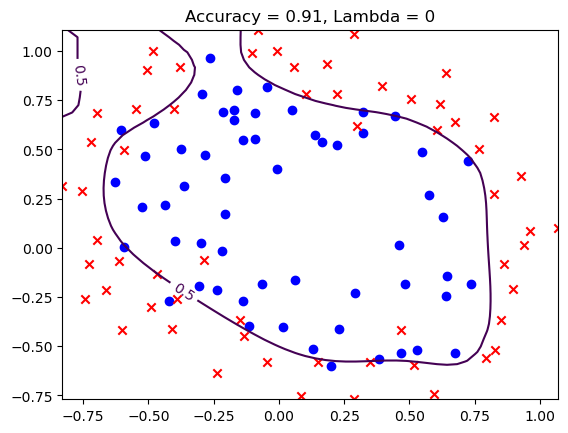

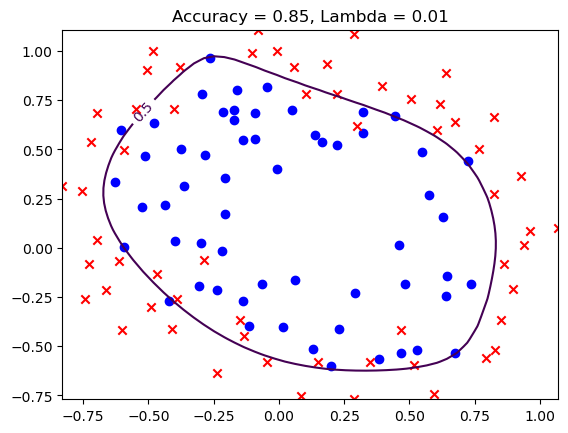

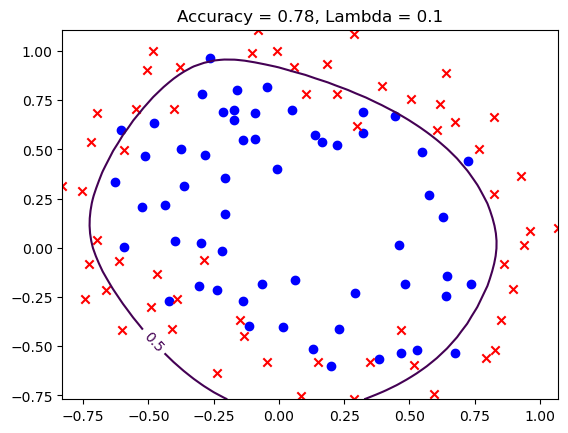

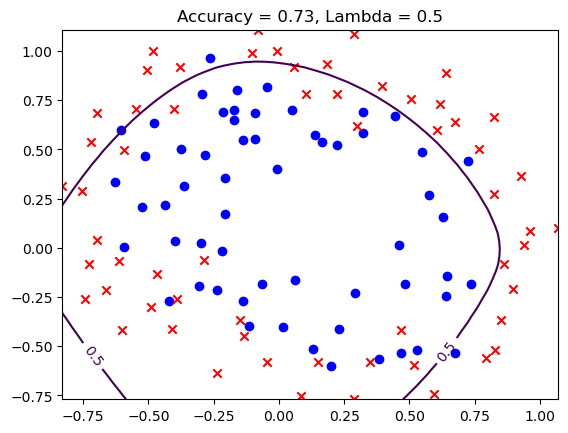

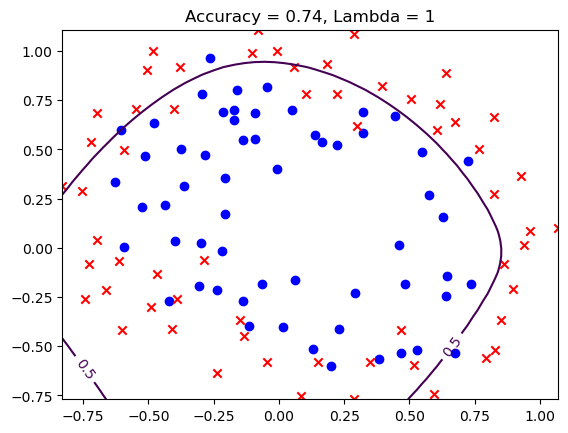

In [149]:
# Your Code Here
lambdas = [0, 0.01, 0.1, 0.5, 1]

for lambda_ in lambdas:
    # map features to 15
    X_norm, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:, 0], X[:,1], degree=15)
    w, J = GradientDescent_logistic_reg(X_norm, y, alpha=.1, lam=lambda_, epsilon=10**(-7))
    

    results = classifyVector(X_norm, w)
    accuracy = np.sum(y == results) / len(y)
    plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees=15, means=mu, sigmas=sigma, title=f'Accuracy = {accuracy:.2f}, Lambda = {lambda_}')

---

It seems that the regularization just simplifies the decision boundary so much that it does not allow it to become useful, having a poor fit of the data. With $\lambda = 0.01$ the result could be usuable but further than that not. Seeing this results perhaps is not worth to try to regularize the decision boundary of a logistic regression model.

---


# 4.3 Using sklearn

This section has no exercises. Your task is to read the manual, and understand how to repeat everything we have done up to now using the functions available in the library scikit-learn.

To get you started, this is the overview manual page for linear models: https://scikit-learn.org/stable/modules/linear_model.html

### Linear Regression

Read the manual page here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [150]:
# Load the House dataset
with open('HouseData.pkl', 'rb') as f:
    X, y = pickle.load(f)
    
print (X.shape)
print (y.shape)

size = X[:, 0]
size = size.reshape(-1, 1)

(47, 2)
(47,)


In [151]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(size, y) # Note that we do not pass the bias feature explicitly, as by default the linear model adds it (it is the "intercept")

print(model.intercept_, model.coef_)

71270.49244872917 [134.52528772]


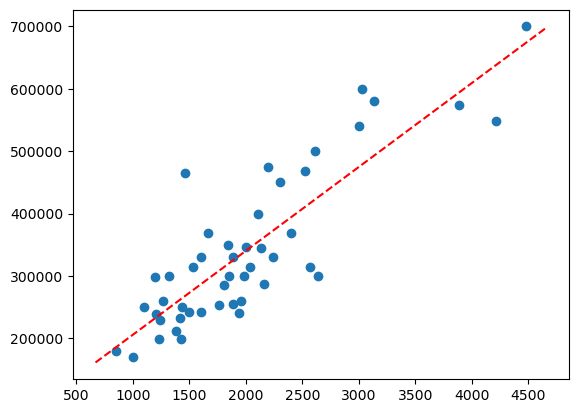

In [152]:
plt.scatter(size, y)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = model.intercept_ + model.coef_[0] * x_vals
plt.plot(x_vals, y_vals, 'r--')

In [153]:
#predict values on the training set
test_sizes = np.array([1000, 2500, 3200, 4000])
test_sizes = test_sizes.reshape(-1, 1)

model.predict(test_sizes)

array([205795.78016897, 407583.71174933, 501751.4131535 , 609371.64332969])

Now we can repeat the process, but using the standard scaler of scikit-learn to standardise the features before we start: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [154]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(size)
print("Mean:", scaler.mean_, "Var:", scaler.var_)
size_scaled = scaler.transform(size)

Mean: [2000.68085106] Var: [618114.55771842]


In [155]:
model.fit(size_scaled, y)

print(model.intercept_, model.coef_)

340412.6595744681 [105764.13349282]


The `StandardScaler` object, once fit, keeps track of the way it did the scaling, and can be used again with any new data.

In [156]:
test_sizes = np.array([1000, 2500, 3200, 4000])
test_sizes = test_sizes.reshape(-1, 1)
test_sizes = scaler.transform(test_sizes) # normalise them the same way as we did for the training set, before we pass them through our model
model.predict(test_sizes)

array([205795.78016897, 407583.71174933, 501751.4131535 , 609371.64332969])

### Polynomial Regression

Read the manual page: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [157]:
from sklearn.preprocessing import PolynomialFeatures

In [158]:
# Load the House dataset
with open('PolynomialData.pkl', 'rb') as f:
    x, y = pickle.load(f)

print (x.shape)
print (y.shape)

(50, 1)
(50,)


In [159]:
poly = PolynomialFeatures(3, include_bias = False ) # up to degree-3 polynomial features, but do not include the bias term (degree 0 invented feature)
x_poly = poly.fit_transform(x)

scaler = StandardScaler()
scaler.fit(x_poly) 
print("Mean:", scaler.mean_, "Var:", scaler.var_)
x_poly = scaler.transform(x_poly)

Mean: [0.044      9.159792   2.36463944] Var: [   9.157856     55.85142897 2473.0161783 ]


In [160]:
model = linear_model.LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [161]:
print(model.intercept_, model.coef_)

7.845300302600001 [  1.86012922   7.43704704 -16.56649192]


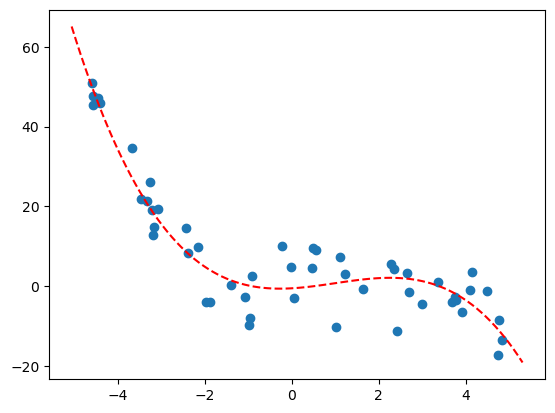

In [162]:
plt.scatter(x, y)

axes = plt.gca()
x_lims = np.array(axes.get_xlim())
xx = np.linspace(x_lims[0], x_lims[1], 100)

xx_poly = poly.fit_transform(xx.reshape(-1, 1))
xx_poly = scaler.transform(xx_poly)

y_vals = model.intercept_ + model.coef_ @ xx_poly.T
plt.plot(xx, y_vals, 'r--')

In [163]:
#predict values on the training set
x_test = np.array([-4, 0, 4])
x_test = x_test.reshape(-1, 1)

x_test_poly = poly.transform(x_test)
x_test_poly = scaler.transform(x_test_poly)

y_hat = model.predict(x_test_poly)
y_hat

array([34.27472471, -0.50926569, -3.44883471])

### Logistic Regression

Read the manual page: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [164]:
# Load the synthetic dataset
import pickle

with open('RingsData.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


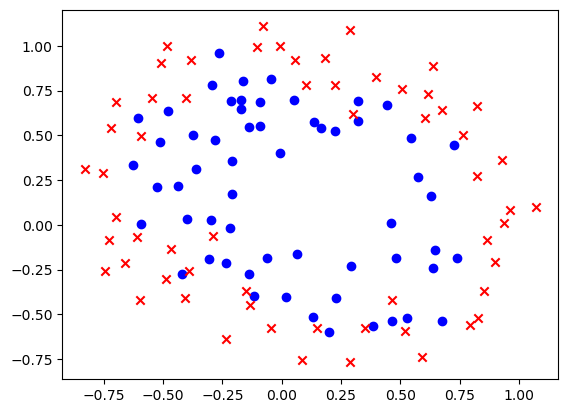

In [165]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

In [166]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000)
clf.fit(X, y)
clf.predict(X)

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [167]:
clf.predict_proba(X[:5]) # for the first 5 data points

array([[0.5068306 , 0.4931694 ],
       [0.49835517, 0.50164483],
       [0.49132941, 0.50867059],
       [0.48101905, 0.51898095],
       [0.47279289, 0.52720711]])

In [168]:
# calculate accuracy
clf.score(X, y)

0.5470085470085471

This is no good, as expected there is no linear decision boundary that separates well the two classes. Now let's create polynomial features

In [169]:
poly = PolynomialFeatures(15) # up to second degree features
x_poly = poly.fit_transform(X)
x_poly.shape

(117, 136)

In [170]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000, penalty = None) # without regularisation, note that it takes ages to converge (see the warning message!)
clf.fit(x_poly, y)
clf.predict(x_poly)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [171]:
clf.predict_proba(x_poly[:5]) # for the first 5 data points

array([[0.07082418, 0.92917582],
       [0.00366972, 0.99633028],
       [0.00298025, 0.99701975],
       [0.0140816 , 0.9859184 ],
       [0.03838919, 0.96161081]])

In [172]:
# calculate accuracy
clf.score(x_poly, y)

0.905982905982906

We seem to be overfitting. Finally, let's add L2 regularisation

In [173]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter = 10000, penalty = 'l2')
clf.fit(x_poly, y)
clf.predict(x_poly)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [174]:
clf.predict_proba(x_poly[:5]) # for the first 5 data points

array([[0.27736024, 0.72263976],
       [0.25970826, 0.74029174],
       [0.27635035, 0.72364965],
       [0.26413386, 0.73586614],
       [0.34559822, 0.65440178]])

In [175]:
# calculate accuracy
clf.score(x_poly, y)

0.8376068376068376

Do a confusion matrix. Read the manual page here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [176]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_poly)
confusion_matrix(y, y_pred)

array([[44, 15],
       [ 4, 54]])

# 4.4 Training, Validation and Test set

Up to now we have been calculating performance on the training set. Here we will see how we can manage different dataset splits using scikit-learn.

In [231]:
# Load the synthetic dataset
import pickle

with open('RingsData.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


<font color=blue>Using the classification dataset above. Split your dataset into a training and test set (80% random). Have a look at the manual page here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</font>

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
# Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<font color=blue>Use a polynomial model like before with logistic regression. Train it on the training set without regularisation. Then test on training and test set. Plot the final costs in the same plot for different degrees of the polynomial model, from 1 to 15.</font>

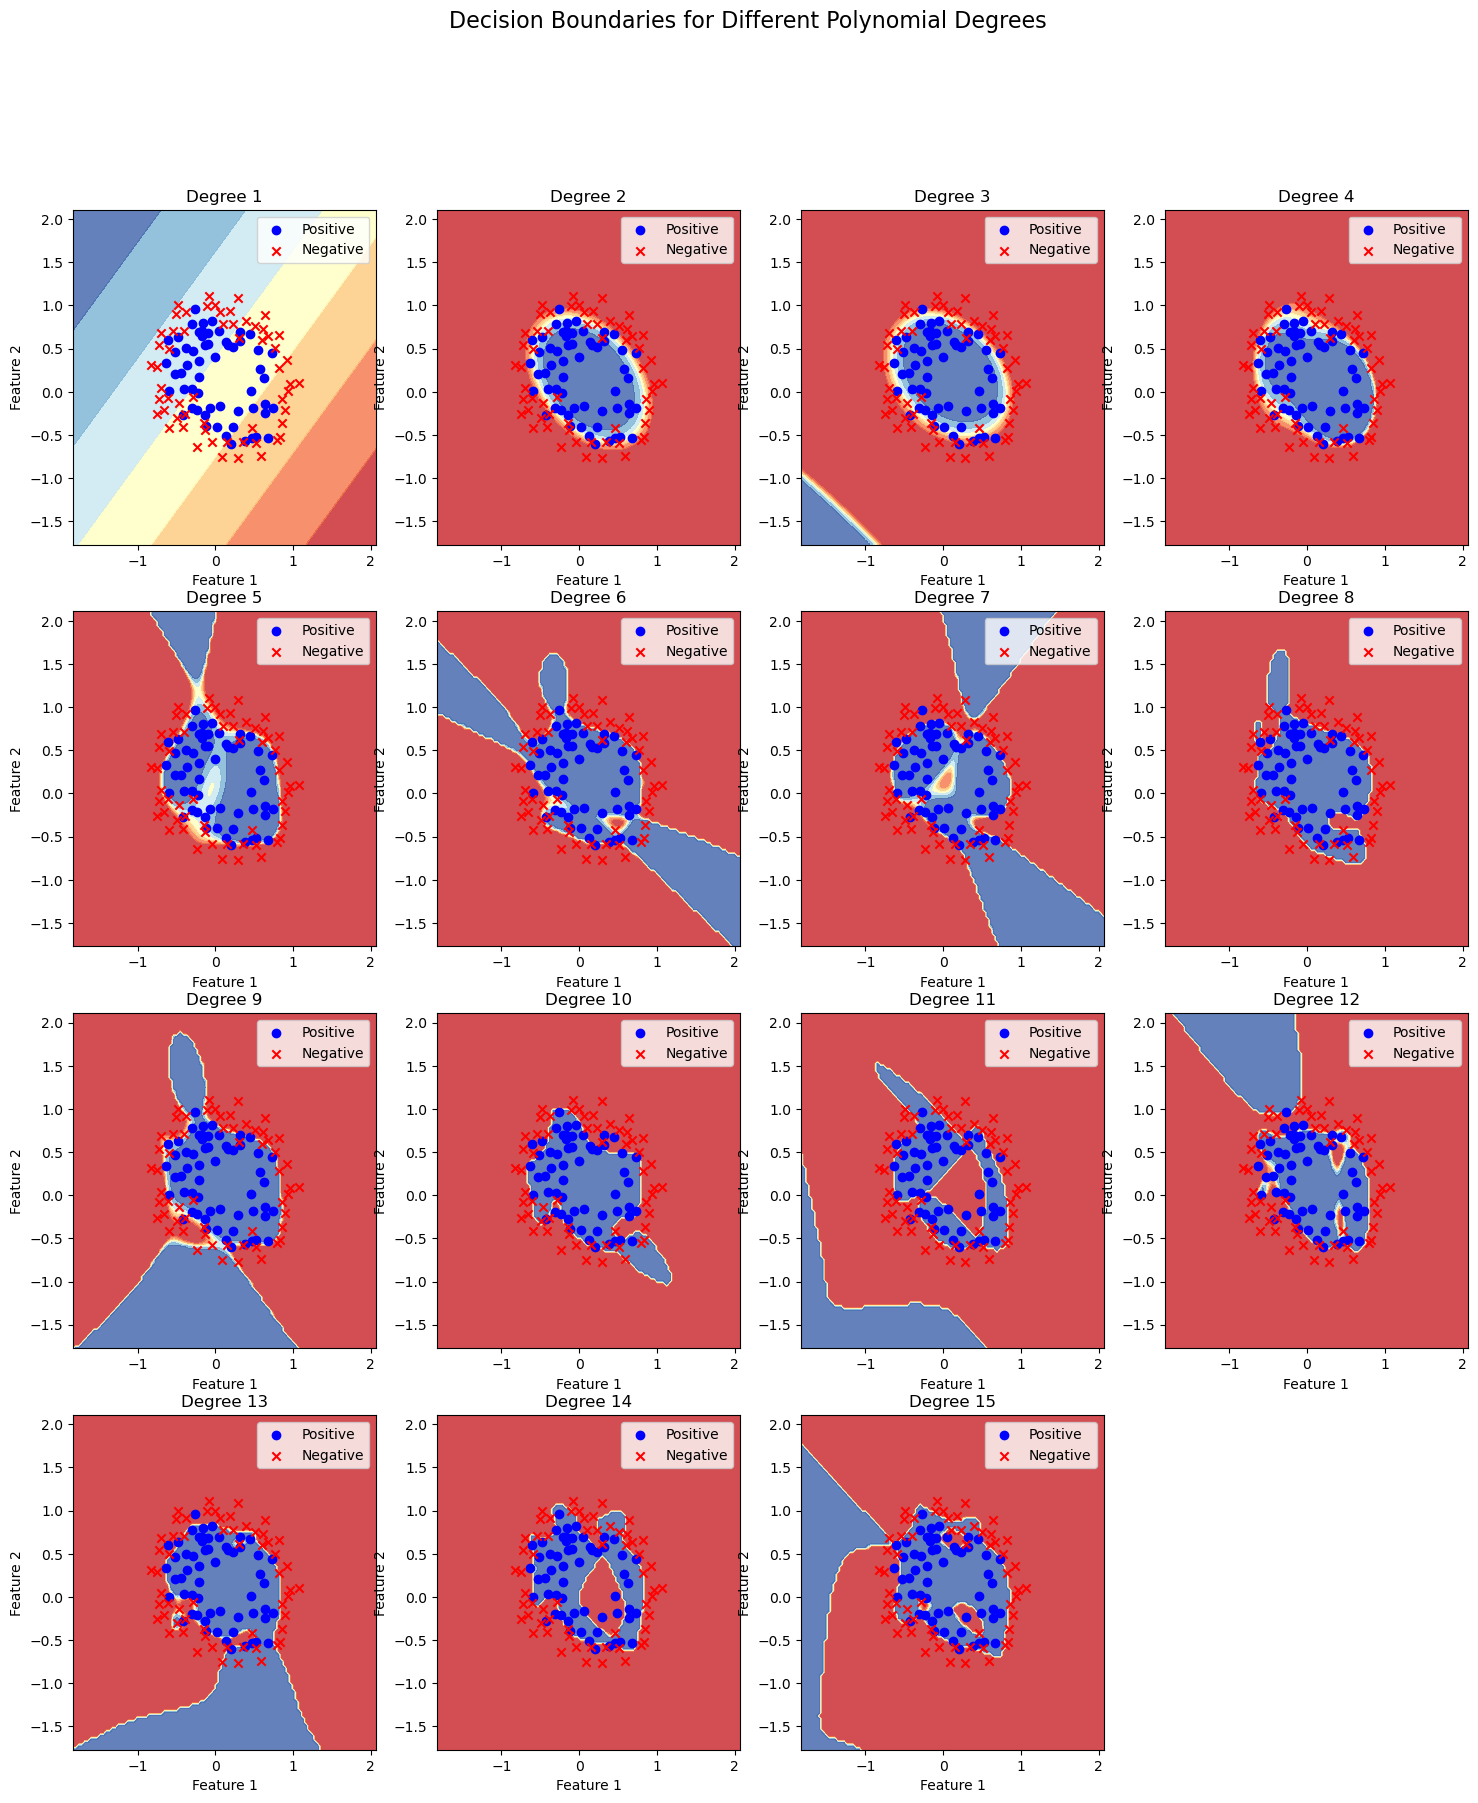

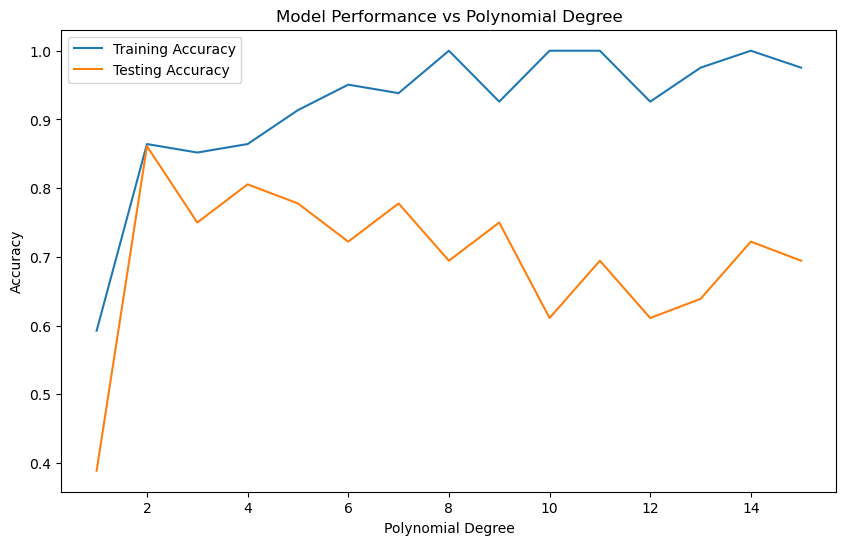

In [243]:
# Your Code Here
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def plot_decision_boundary(X, y, model, degree, ax):
    # Create a mesh grid
    x0, x1 = X[:, 0], X[:, 1]
    xx, yy = np.meshgrid(np.linspace(x0.min()-1, x0.max()+1, 100),
                         np.linspace(x1.min()-1, x1.max()+1, 100))
    
    poly = PolynomialFeatures(degree)
    X_poly_mesh = poly.fit_transform(np.c_[xx.ravel(), yy.ravel()])
    
    Z = model.predict_proba(X_poly_mesh)[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    
    ax.scatter(X[y==1, 0], X[y==1, 1], c='b', marker='o', label='Positive')
    ax.scatter(X[y==0, 0], X[y==0, 1], c='r', marker='x', label='Negative')
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(f'Degree {degree}')
    ax.legend()

degrees = range(1, 16)
train_scores = []
test_scores = []

fig, axs = plt.subplots(4, 4, figsize=(18, 20))
fig.suptitle("Decision Boundaries for Different Polynomial Degrees", fontsize=16)

for i, degree in enumerate(degrees):
    row = i // 4
    col = i % 4
    
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3)
    
    clf = LogisticRegression(random_state=0, max_iter=10000, penalty=None)
    clf.fit(X_train, y_train)

    ax = axs[row, col]
    plot_decision_boundary(X, y, clf, degree, ax)

    train_scores.append(accuracy_score(y_train, clf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, clf.predict(X_test)))

# Remove the unused subplot
axs[-1, -1].remove()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, label='Training Accuracy')
plt.plot(degrees, test_scores, label='Testing Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Polynomial Degree')
plt.legend()
plt.show()

<font color=blue>What do you observe?</font>

---

Running this cell multiple times with a different seed on the train-test split, I notices that there is a big impact depending on which datapoints are passed to the test set.
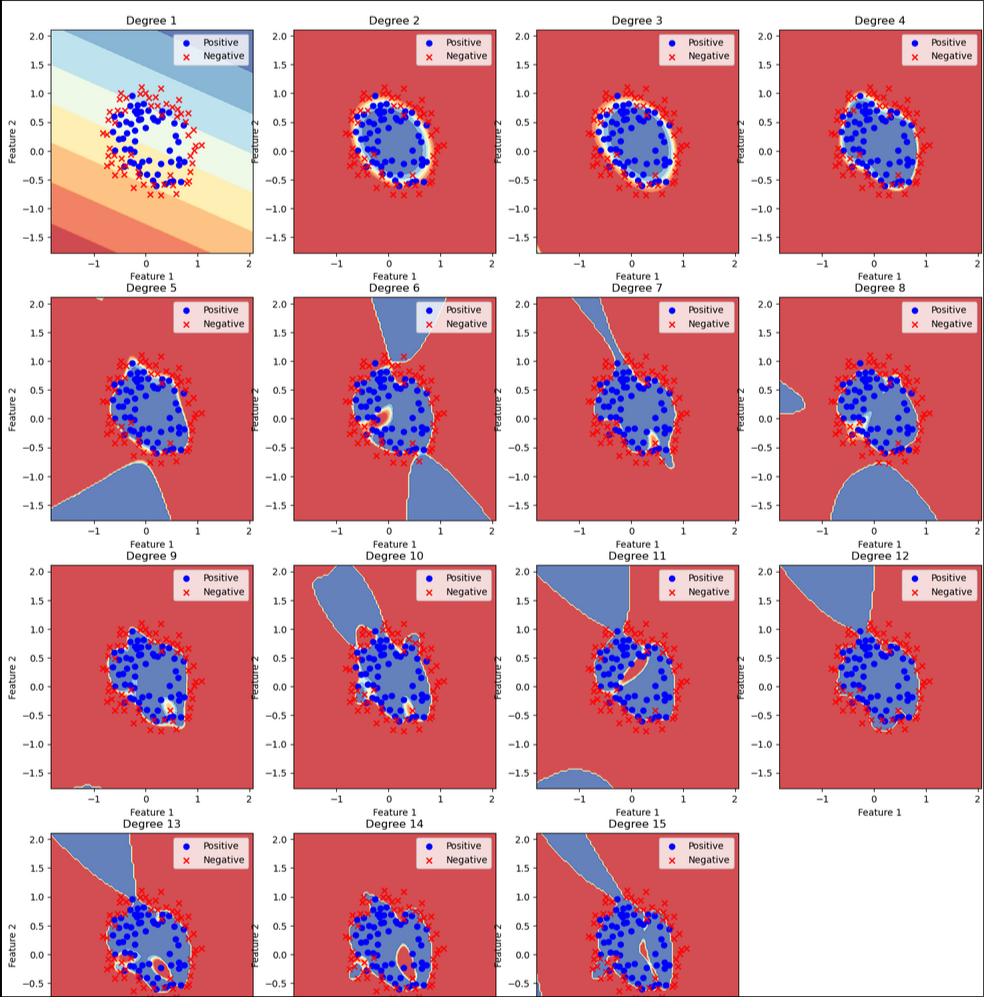

Notice how there is even a blue datapoint right in the middle of the red boundary on the 13 degree plot. This is the accuracy over time of this pacticular run:
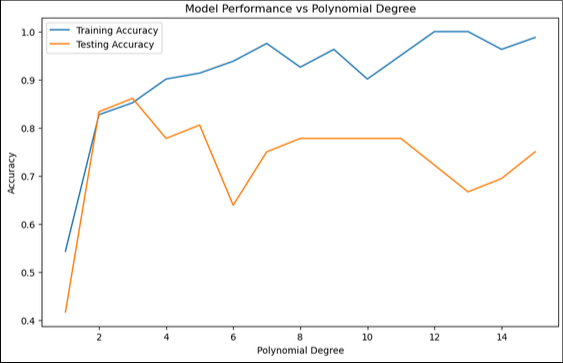


Perhaps there is not enough in the whole dataset to accuractly do a spliting that delivers good results, depending on the run itself or the amount of data in the test set, we get poor test accuracy. The key is understanding that depending on the test-train splot we can get an overfitted model or not. But if we train the model overall, we should not. From what I understand if we have more data, we could more confidently make this split and get reliable results, as we should have a better change of figuring out the true function (getting a more accuracte model).

However...
There is a big problem, because I make the split in each different run, that could be why the results are so inconsistent. I should instead make the features first, then the split, and in each run just grab a part of those features. (I have seen this type of result having a fixed random stat. Having it fixed seem to not solve the inconsistencies between the runs, where in some one there is a blue point un the middle of the red part of the decision boundary).

---

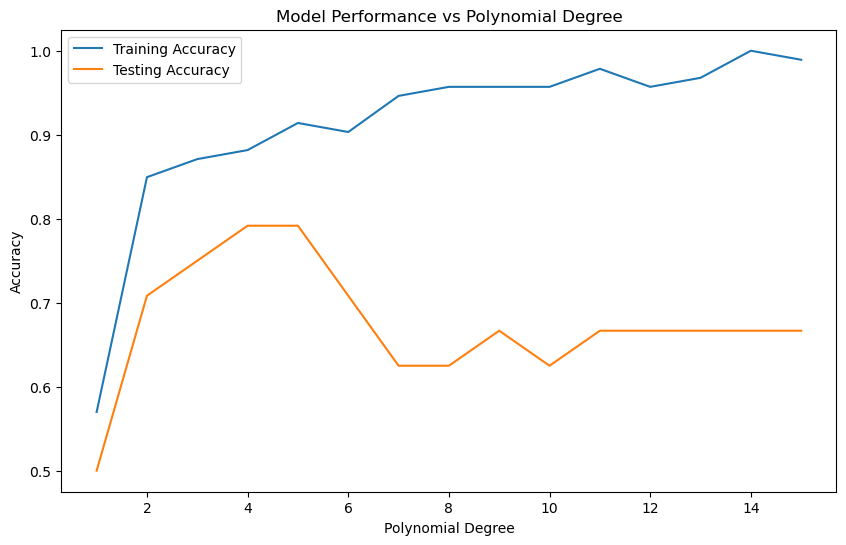

In [263]:
# Your Code Here
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

degrees = range(1, 16)
train_scores = []
test_scores = []

#fig, axs = plt.subplots(4, 4, figsize=(18, 20))
#fig.suptitle("Decision Boundaries for Different Polynomial Degrees", fontsize=16)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for i, degree in enumerate(degrees):
    row = i // 4
    col = i % 4

    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LogisticRegression(random_state=0, max_iter=10000, penalty=None)
    )
    
    model.fit(X_train, y_train)

    ax = axs[row, col]
    #plot_decision_boundary(X, y, model, degree, ax)

    train_scores.append(accuracy_score(y_train, model.predict(X_train)))
    test_scores.append(accuracy_score(y_test, model.predict(X_test)))

# Remove the unused subplot
#axs[-1, -1].remove()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_scores, label='Training Accuracy')
plt.plot(degrees, test_scores, label='Testing Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Polynomial Degree')
plt.legend()
plt.show()

Now both accuracies seem to be more consistent between degree. Using the pipeline, i could not figure out how to plot the decision boundaries using the same function as before, and i cannot completly verify that inconsistencies from the decision boundaries found before are gone.

<font color = blue>Now do 5-fold cross-validation. Then report the average performance and its standard deviation</font>

See the manual page at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

In [275]:
# Your Code Here

from sklearn.model_selection import cross_validate

degree = 15 # using just 15 this time
model = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    LogisticRegression(random_state=0, max_iter=10000, penalty=None)
)

results = cross_validate(model, X, y, cv=5)

results
test_scores = results['test_score']

average_performance = np.mean(test_scores)
std = np.std(test_scores)

print(f'Average performance: {average_performance:.4f}')
print(f'Standard deviation: {std:.4f}')

Average performance: 0.6409
Standard deviation: 0.0428


Looking at the documention it says:
>  Computing training scores is used to get insights on how different parameter settings impact the overfitting/underfitting trade-off.

Using the argument `return_train_score=True`, with it its possible to compute two separate scores, one several test sets and another one for the training sets:

In [276]:
degree = 15
model = make_pipeline(
    PolynomialFeatures(degree, include_bias=False),
    LogisticRegression(random_state=0, max_iter=10000, penalty=None)
)

results = cross_validate(model, X, y, cv=5, return_train_score=True)

test_scores = results['test_score']
train_scores = results['train_score']

average_test = np.mean(test_scores)
std_test = np.std(test_scores)

average_train = np.mean(train_scores)
std_train= np.std(train_scores)

print(f'Standard deviation of test scores: {average_test:.4f}')
print(f'Standard deviation: {std_test:.4f}')

print(f'Standard deviation of test scores: {average_train:.4f}')
print(f'Standard deviation: {std_train:.4f}')

Standard deviation of test scores: 0.6409
Standard deviation: 0.0428
Standard deviation of test scores: 0.9445
Standard deviation: 0.0298


From these values, it seems that there is a still a bit of overfitting because. How we could how for sure that the difference betwen the splits is not the culprit as we are doing 5-fold CV.

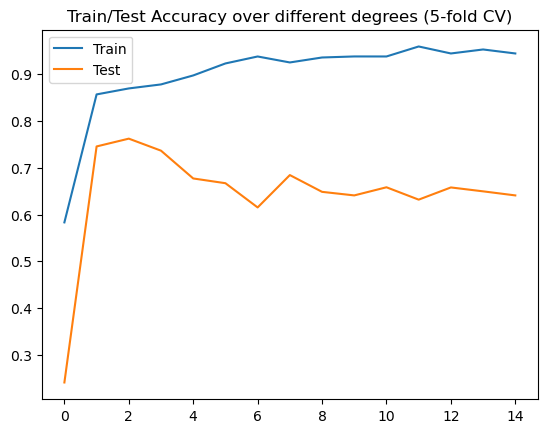

In [277]:
overall_train = []
overall_test = []

for degree in range(1, 16):
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LogisticRegression(random_state=0, max_iter=10000, penalty=None)
    )
    
    results = cross_validate(model, X, y, cv=5, return_train_score=True)
    
    test_scores = results['test_score']
    train_scores = results['train_score']
    
    average_test = np.mean(test_scores)
    average_train = np.mean(train_scores)
    
    overall_train.append(average_train)
    overall_test.append(average_test)

assert len(overall_train) == len(overall_test)
xx = np.arange(len(overall_train))
plt.plot(xx, overall_train, label='Train')
plt.plot(xx, overall_test, label='Test')
plt.title('Train/Test Accuracy over different degrees (5-fold CV)')
plt.legend()
plt.show()

There still seem to be overfitting with this particular model and data, since there is not much change with the degree changes. Just an slight increase as the degree increases in the training number, and the oposside (a little decrease) witht the test accuracy.

**Disclaimer**: I know that in the slides the cross-validation is used to create validation datasets. However, I have use it here to create test datasets. I dont know if this is exactly what we need to do. I am always afraid of not getting a perfect score on these assignments. That is why I have tried to find intersting insights and explain my though process and issues that I see along the way.